In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/drive/My Drive/GColab')

In [0]:
!pip install -q tensorflow==1.13.1
!pip install -q pprint


In [4]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [0]:
# seeds for reproducibility
from numpy.random import seed
seed(1337)
from tensorflow import set_random_seed
set_random_seed(1337)

import numpy as np

# tensorflow properties
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers

# to implement functions at certain learning steps e.g. record weights
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.callbacks import EarlyStopping

# imports from other files
import Callbacks
import model_selection
import data_selection
import classes
import plotting
import util
import info_plane

## Load Data

In [6]:
set_name = "tishby"
#set_name = "mnist"


nrs = [3,8,1]
samples = 500
seed(1337)
set_random_seed(1337)
X_train, X_test, y_train, y_test = data_selection.select_data(set_name, shuffle=False,
                                                              samples_per_class = samples,
                                                              list_of_nrs=nrs)


Loading tishby Data...


## Create Classes, Define model and train it

In [0]:
# object to record parameters
outputs = classes.Outputs()

nr_of_tot_epochs = 8000
nr_of_epochs = 8000
batch = 256
learning_r = [0.0004]
record_all_flag = False
rec_test_flag = True
save_data_flag = False
save_MI_and_plots = True

stop_early = True
perf_stop = False

In [8]:
# model 1 = model with leading ReLU
# model 2 = model with leading TanH
# model 3 = full ReLU
# model 4 = full TanH
# ...
seed(1337)
set_random_seed(1337)
model_nr = 3
model, architecture = model_selection.select_model(model_nr, nr_of_epochs,
                                                   set_name, X_train.shape, y_train)

amount of classes 2
Input shape:  (3276, 12)  length:  2
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# call callback functions
output_recording = LambdaCallback(on_epoch_end=lambda epoch,
                                   logs: Callbacks.record_activations(outputs, model,
                                                                      epoch, X_train,
                                                                      X_test, y_test,
                                                                      batch, 
                                                                      record_all_flag,
                                                                      rec_test_flag))

early_stopp = EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')

callback returns matrix with n arrays where n is the number of features and each array has m elements where m is the number of neurons

In [10]:
# or lr = 0.0004
adam = optimizers.Adam(lr=learning_r)
model.compile(loss="categorical_crossentropy",
              optimizer=adam,
              metrics=["accuracy"])

seed(1337)
set_random_seed(1337)
if stop_early == True:
    history = model.fit(X_train, y_train, epochs=nr_of_epochs, batch_size=batch,
                        validation_split=0.2, callbacks = [output_recording, early_stopp])
else:
    history = model.fit(X_train, y_train, epochs=nr_of_epochs, batch_size=batch,
                        validation_split=0.2, callbacks = [output_recording])


Train on 2620 samples, validate on 656 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/8000
2620/2620 [==============================] - 0s 120us/sample - loss: 0.6852 - acc: 0.5237 - val_loss: 0.6786 - val_acc: 0.5518
Epoch 2/8000
2620/2620 [==============================] - 0s 36us/sample - loss: 0.6837 - acc: 0.5252 - val_loss: 0.6769 - val_acc: 0.5518
Epoch 3/8000
2620/2620 [==============================] - 0s 38us/sample - loss: 0.6820 - acc: 0.5275 - val_loss: 0.6750 - val_acc: 0.5534
Epoch 4/8000
2620/2620 [==============================] - 0s 42us/sample - loss: 0.6802 - acc: 0.5324 - val_loss: 0.6732 - val_acc: 0.5579
Epoch 5/8000
2620/2620 [==============================] - 0s 38us/sample - loss: 0.6783 - acc: 0.5393 - val_loss: 0.6711 - val_acc: 0.5625
Epoch 6/8000
2620/2620 [==============================] - 0s 40us/sample - loss: 0.6762 - acc: 0.5447 - val_loss: 0.6687 - val_acc: 0.5655
Epoch 7/8000
2620/2620 [==============================] - 0s 38us/samp

# Test Area

In [0]:
def name_creation(architecture, learning_r, batch, stop_early, perf_stop):
    if stop_early == True:
        common_name = "early_stop_" + architecture + "_lr_" + str(learning_r) + "_batchsize_" + str(batch)
    if perf_stop == True:
        common_name = "perfect_stop_" + architecture + "_lr_" + str(learning_r) + "_batchsize_" + str(batch)
    else:
        common_name = architecture + "_lr_" + str(learning_r) + "_batchsize_" + str(batch)

    
    return common_name

In [12]:
common_name = name_creation(architecture, learning_r, batch, stop_early, perf_stop)
    
print(common_name)
    
color_list = ["red", "blue", "green", "orange", "purple",
              "brown", "pink", "teal", "goldenrod"]
show_flag = True

tishby8000D10R_D7R_D5R_D4R_D3R_D1S_lr_[0.0004]_batchsize_256


In [13]:
model.evaluate(X_test, y_test, verbose=0)

[0.3076749852517756, 0.8817073]

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)[1]
print(score)

aname = common_name + "_activations"
outputs.model_score = score
if save_data_flag == True:
    util.save(outputs, aname)

hname = common_name + "_history"
h_obj = history.history
h_obj["model_score"] = score
if save_data_flag == True:
    util.save(h_obj, hname)



0.8817073


creating history plot


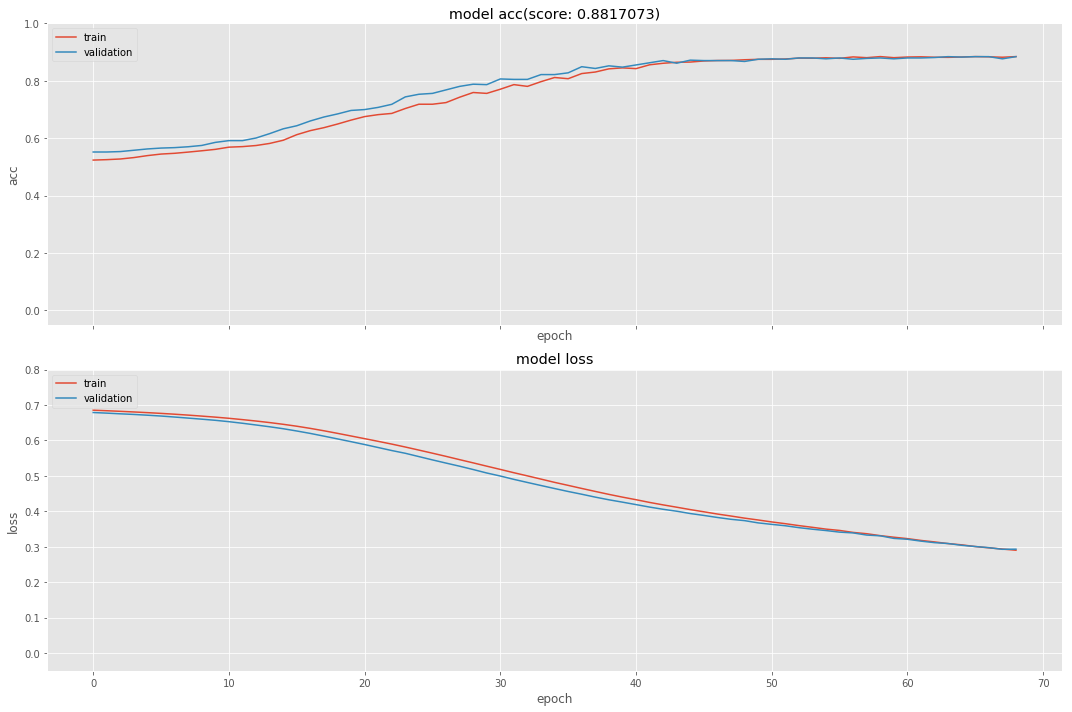

In [15]:
plotting.plot_history(h_obj, common_name, show_flag, save_MI_and_plots)

creating testscore devolopment plot


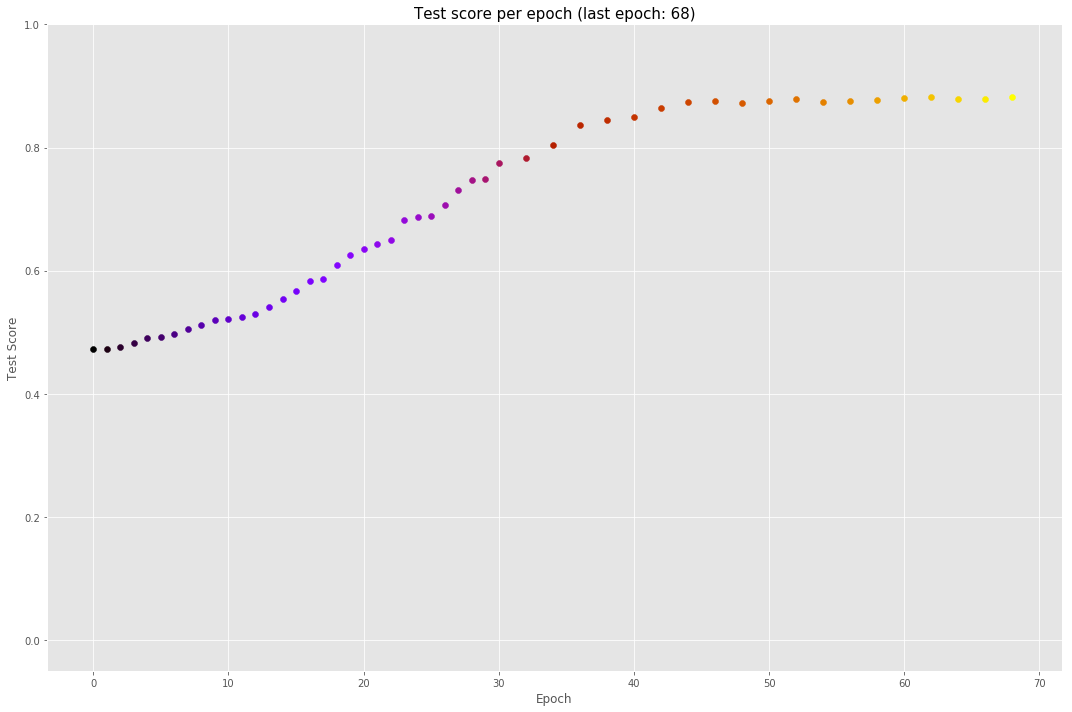

In [16]:
plotting.plot_test_development(outputs.int_model_score, common_name, show_flag, save_MI_and_plots)

o max:  {0: 2.984454, 1: 4.722856, 2: 5.22898, 3: 6.2014413, 4: 5.929505, 5: 0.9999763}
o min:  {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 2.3736095e-05}
X and Y MI:  0.9976734295143714 , X Entropy:  11.677719641641012
MI for epoch  0  is being calculated for  0.3  bins
MI for epoch  1  is being calculated for  0.3  bins
MI for epoch  2  is being calculated for  0.3  bins
MI for epoch  3  is being calculated for  0.3  bins
MI for epoch  4  is being calculated for  0.3  bins
MI for epoch  5  is being calculated for  0.3  bins
MI for epoch  6  is being calculated for  0.3  bins
MI for epoch  7  is being calculated for  0.3  bins
MI for epoch  8  is being calculated for  0.3  bins
MI for epoch  9  is being calculated for  0.3  bins
MI for epoch  10  is being calculated for  0.3  bins
MI for epoch  11  is being calculated for  0.3  bins
MI for epoch  12  is being calculated for  0.3  bins
MI for epoch  13  is being calculated for  0.3  bins
MI for epoch  14  is being calculated for  0.3  

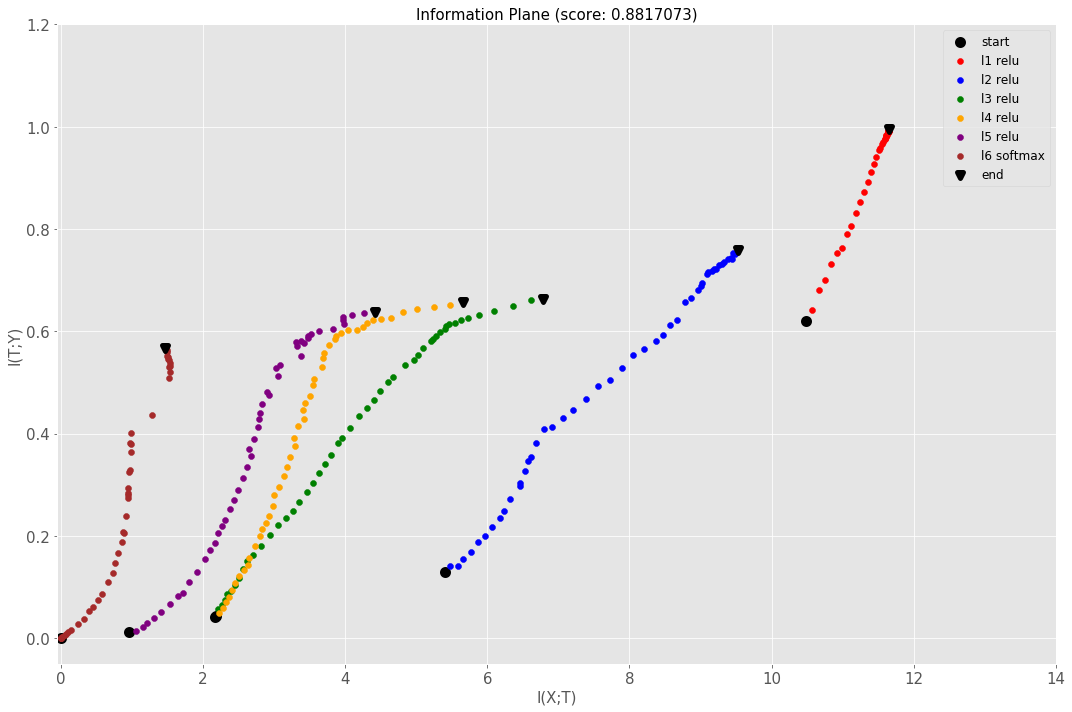

creating info plane epoch view plot


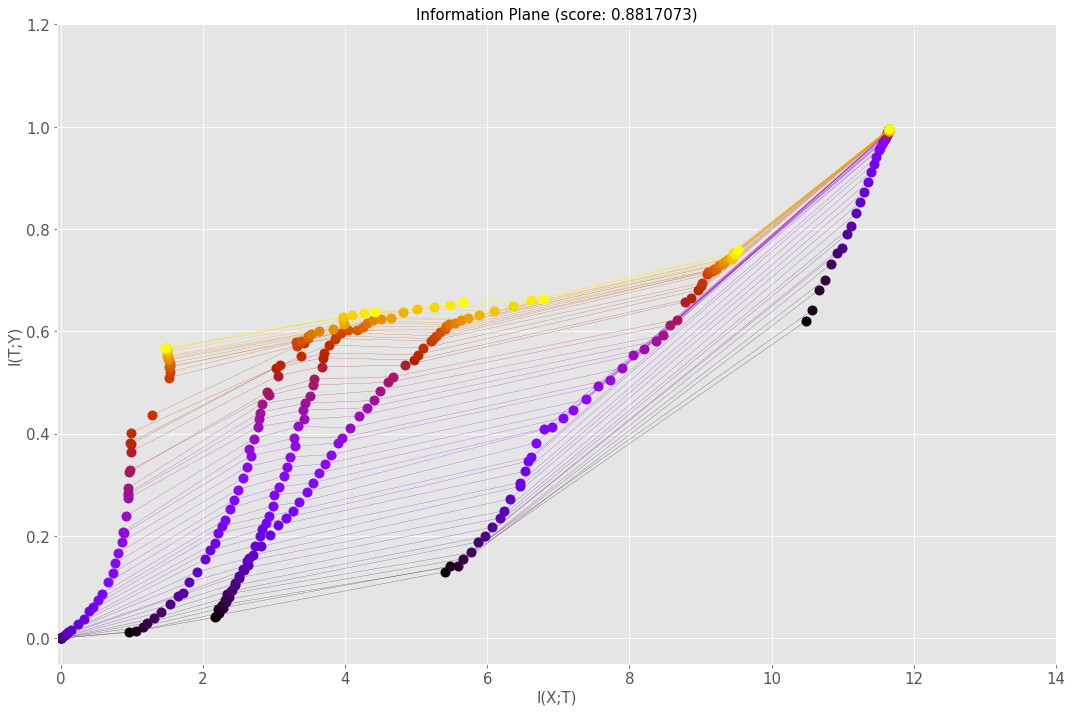

Creating combinationview plot


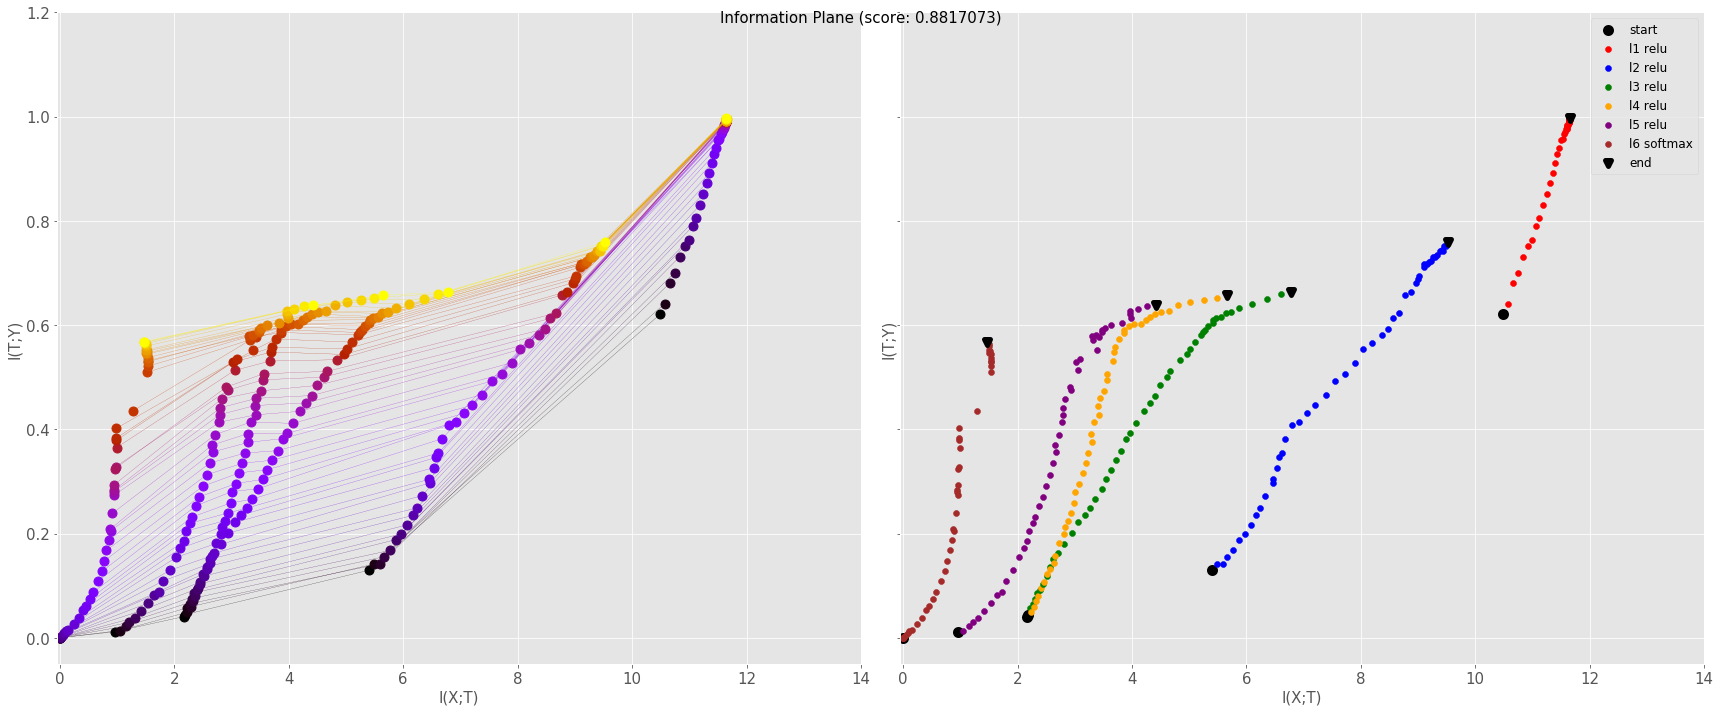

In [17]:
est_type_flag = 1
bin_amount = 0.3
bin_size_or_nr=True
separate_flag = False

seed(1337)
set_random_seed(1337)

BMI_object = classes.Binning_MI()

BMI_object = info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                            est_type_flag, color_list, bin_amount,
                            bin_size_or_nr, show_flag, separate_flag,
                            save_MI_and_plots, False)

## Empty Bin Plots
##### this creates the empty bin plot and bin histograms

In [0]:
binning_name = common_name + "_" + str(bin_amount) +"_bins"

Creating standard deviation development plot


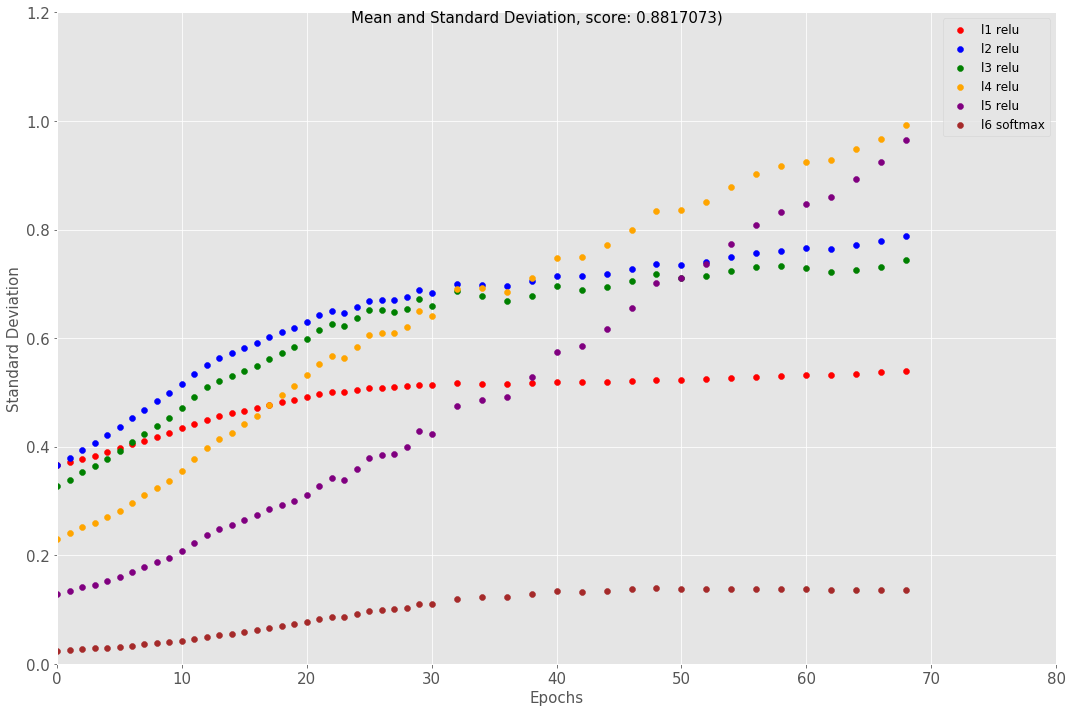

In [19]:
plotting.plot_std_abs_activations(binning_name, outputs, color_list, nr_of_tot_epochs,
                                  show_flag, save_MI_and_plots, full_flag=True)


Plotting empty bins


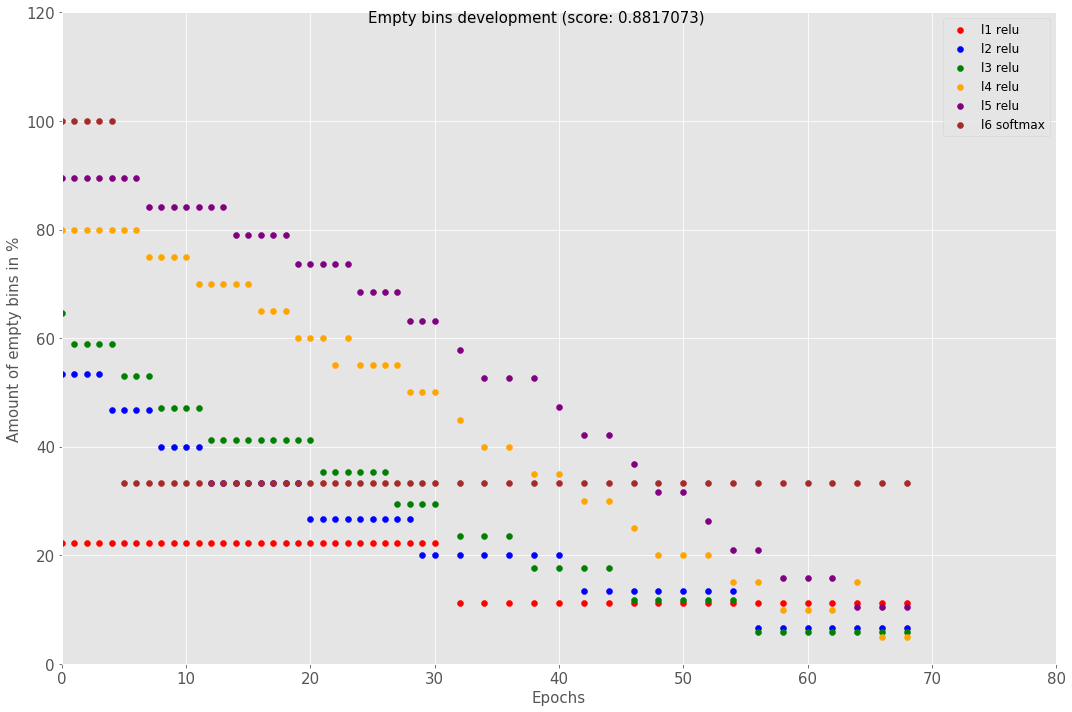

In [20]:
plotting.plot_empty_bins(binning_name, BMI_object, nr_of_tot_epochs, color_list,
                         show_flag, save_MI_and_plots, full_flag=True)

In [21]:
# how many layers
dense_count = 0
for layer in model.layers:
    print(layer.name)
    if "dense" in layer.name:
        dense_count += 1

dense
activation
dense_1
activation_1
dense_2
activation_2
dense_3
activation_3
dense_4
activation_4
flatten
dense_5
activation_5


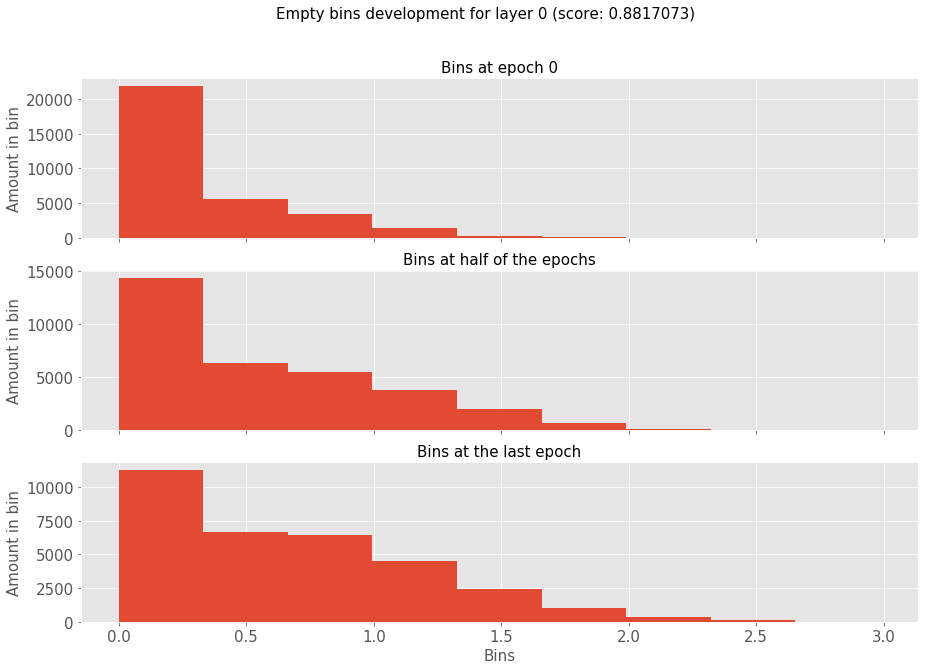

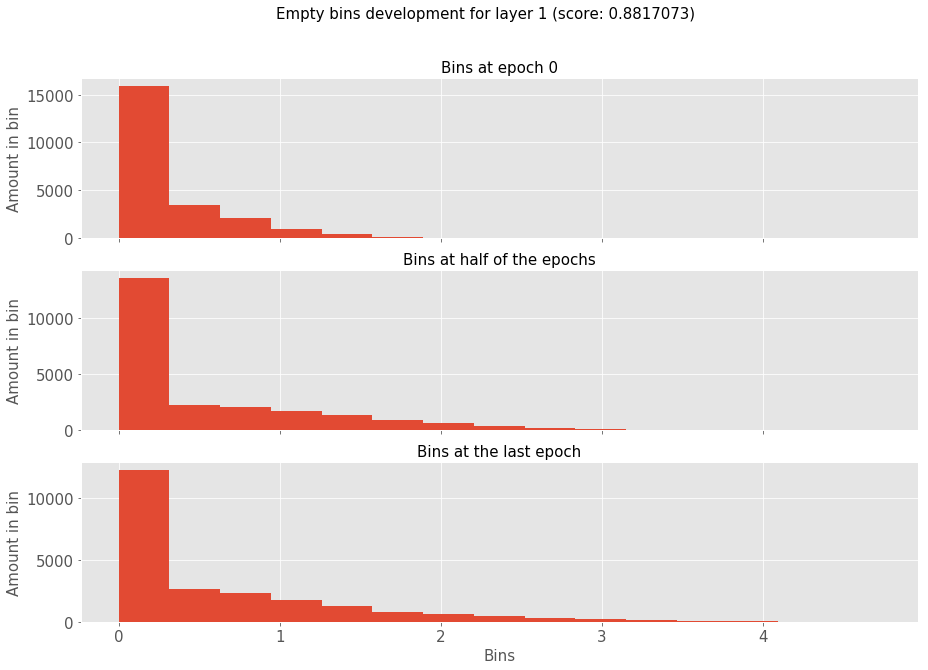

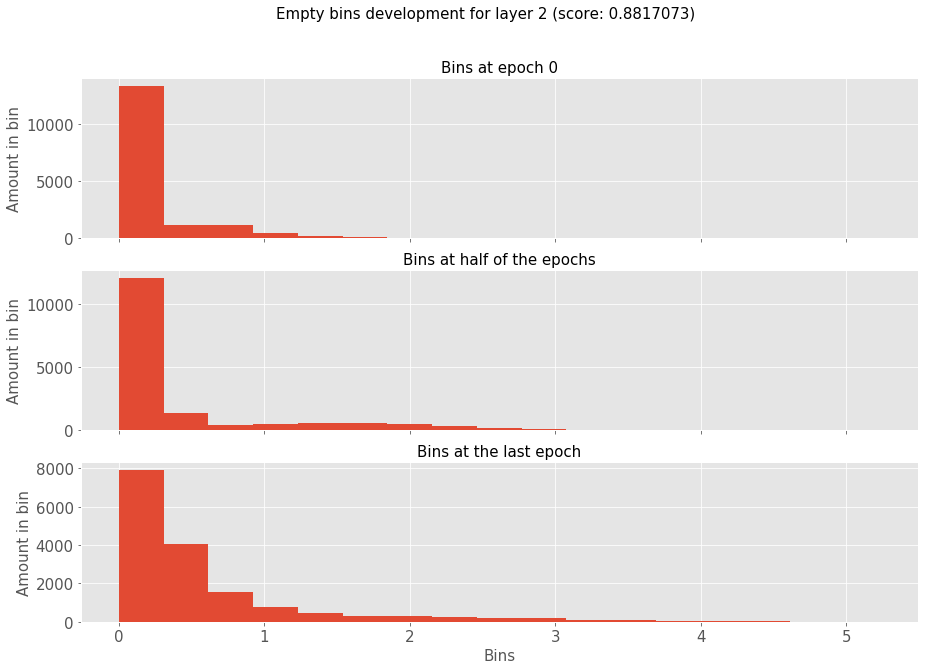

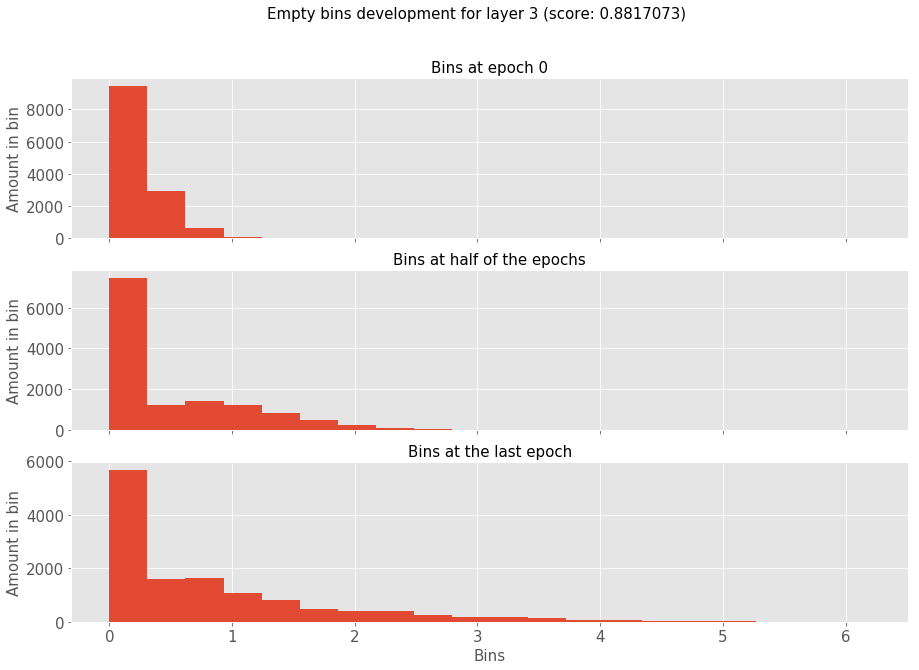

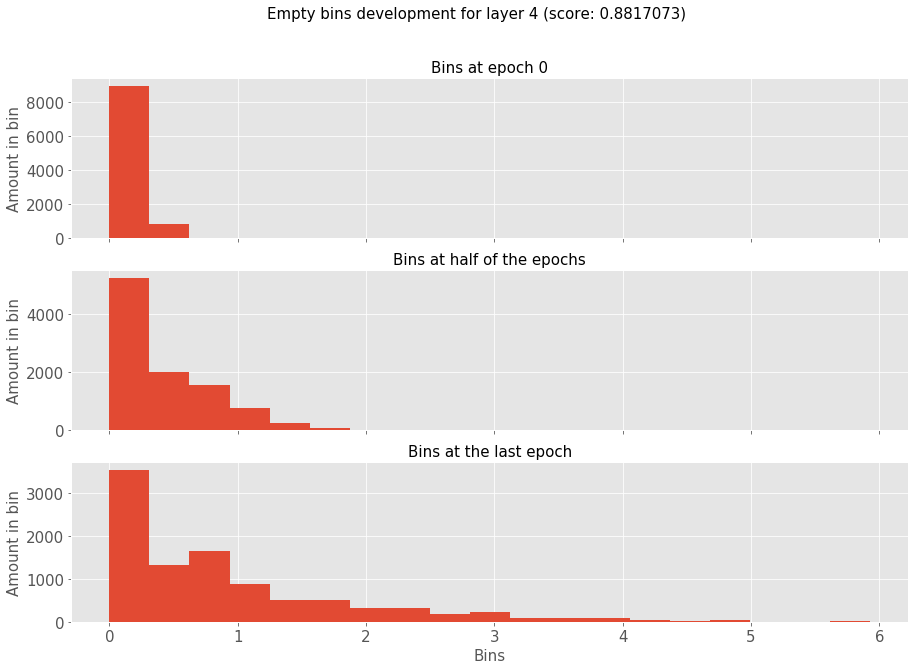

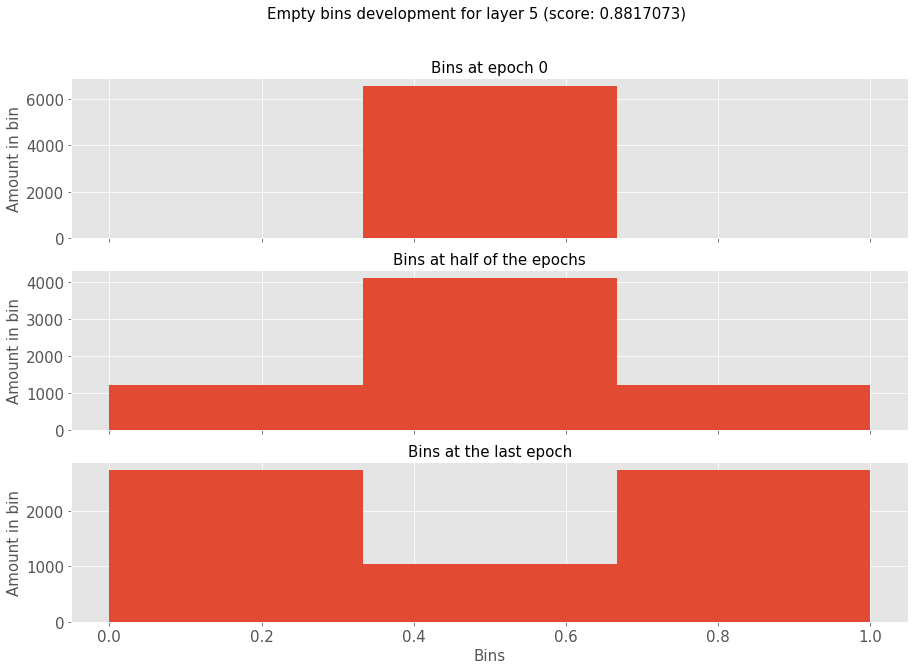

In [22]:
# for each layer index
for i in range(0,dense_count):
    plotting.plot_bin_histo(binning_name, i, outputs, BMI_object,
                            show_flag, save_MI_and_plots)